imports step 0


In [6]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


nltk_stopwords = stopwords.words('english')
custom_stopwords = ["www", ".com", "http"]

Step 1. Load data

In [7]:
df = pd.read_csv("assignment.csv")
df.head()                   

,text,sentiment
0,i guess that if a very wild bachelor party had...,0
1,"with the abundance of trite , recycled movies ...",1
2,"as a hot-shot defense attorney , kevin lomax (...",0
3,hedwig ( john cameron mitchell ) was born a bo...,1
4,"i've heard it called "" jaws with claws "" and t...",0


DATA EXPLORATION

In [8]:
print("\nDataset information:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       2000 non-null   object
 1   sentiment  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None

Summary statistics:
         sentiment
count  2000.000000
mean      0.500000
std       0.500125
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000


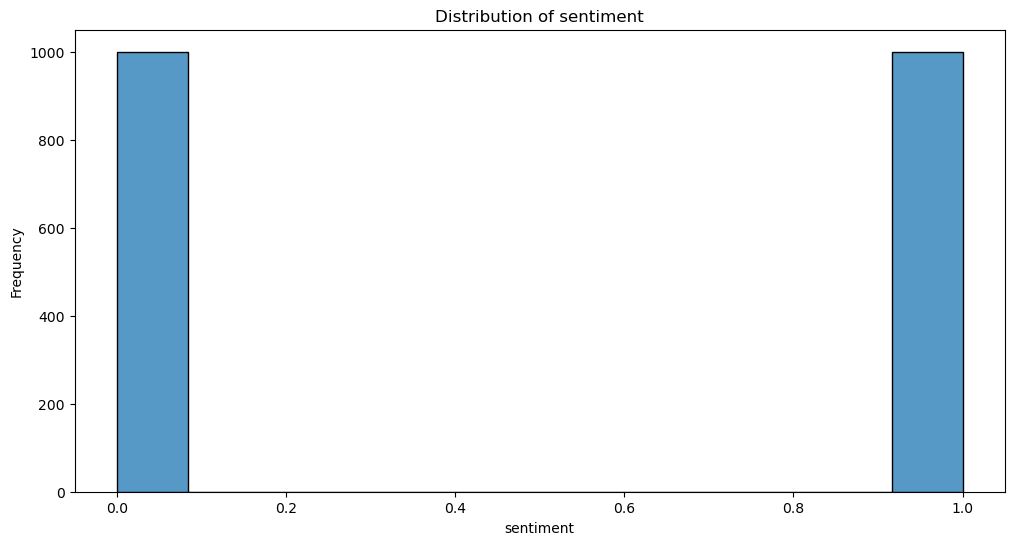

In [9]:
#FILL UP 
df.info
df.describe

numerical_column = 'sentiment'  
plt.figure(figsize=(12, 6))
sns.histplot(df[numerical_column])
plt.title(f'Distribution of {numerical_column}')
plt.xlabel(numerical_column)
plt.ylabel('Frequency')
plt.show()


Step 2. clean data / pre-processing

In [10]:
def clean_text(input_text):
    output_text = str(input_text).translate(str.maketrans('','',string.punctuation)) 
    output_text = output_text.lower() 
    output_text = re.sub(r'\d+', '', output_text) 
    return output_text

def lemm_text(input_text): 
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(input_text)
    words = [word for word in words if word.lower() not in nltk_stopwords] 
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemma_output = ' '.join(lemmatized_words)
    return lemma_output

def process_with_lemm(input_text):
    output_text = clean_text(input_text)
    output_text = lemm_text(output_text)
    return output_text

In [11]:
df_cleaned = df.copy() 
df_cleaned['text'] = df_cleaned['text'].apply(process_with_lemm) 
df_cleaned.head()

,text,sentiment
0,guess wild bachelor party gone really bad woul...,0
1,abundance trite recycled movie late tremendous...,1
2,hotshot defense attorney kevin lomax keanu ree...,0
3,hedwig john cameron mitchell born boy named ha...,1
4,ive heard called jaw claw thats fair summation...,0


Step 3. vectorize text

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_features=500) 

X_temp = tfidf_vectorizer.fit_transform(df_cleaned['text'])
y_temp = pd.get_dummies(df_cleaned['sentiment'])

In [13]:
X_temp, y_temp

(<2000x500 sparse matrix of type '<class 'numpy.float64'>'
 	with 198731 stored elements in Compressed Sparse Row format>,
           0      1
 0      True  False
 1     False   True
 2      True  False
 3     False   True
 4      True  False
 ...     ...    ...
 1995   True  False
 1996   True  False
 1997  False   True
 1998   True  False
 1999   True  False
 
 [2000 rows x 2 columns])

Step 4. Train Test Split

In [14]:
X = X_temp.toarray() 
print(X)
print(X.shape)


y = y_temp.values 
print(y)
print(y.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0847295  0.         0.         ... 0.         0.         0.        ]
 [0.         0.08751722 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.0511564  0.05220807 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(2000, 500)
[[ True False]
 [False  True]
 [ True False]
 ...
 [False  True]
 [ True False]
 [ True False]]
(2000, 2)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5. Build Model

In [16]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu')) 

model.add(Dense(y.shape[1], activation='sigmoid'))
model.summary

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Fit model

In [17]:
num_epochs = 15

history = model.fit(x_train, y_train, epochs=num_epochs, 
                    validation_data=(x_test, y_test))

Epoch 1/15
50/50 [==============================] - 1s 11ms/step - loss: 0.6819 - accuracy: 0.6344 - val_loss: 0.6678 - val_accuracy: 0.6275
Epoch 2/15
50/50 [==============================] - 0s 4ms/step - loss: 0.6268 - accuracy: 0.7625 - val_loss: 0.6005 - val_accuracy: 0.7600
Epoch 3/15
50/50 [==============================] - 0s 4ms/step - loss: 0.5389 - accuracy: 0.8181 - val_loss: 0.5344 - val_accuracy: 0.7650
Epoch 4/15
50/50 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.8363 - val_loss: 0.4931 - val_accuracy: 0.7700
Epoch 5/15
50/50 [==============================] - 0s 4ms/step - loss: 0.4037 - accuracy: 0.8487 - val_loss: 0.4694 - val_accuracy: 0.7675
Epoch 6/15
50/50 [==============================] - 0s 4ms/step - loss: 0.3632 - accuracy: 0.8650 - val_loss: 0.4596 - val_accuracy: 0.7625
Epoch 7/15
50/50 [==============================] - 0s 4ms/step - loss: 0.3353 - accuracy: 0.8644 - val_loss: 0.4544 - val_accuracy: 0.7775
Epoch 8/15
50/50 [=

In [18]:
loss, accuracy = model.evaluate(x_test, y_test) 
print(f'Accuracy: {accuracy}')

 1/13 [=>............................] - ETA: 0s - loss: 0.4303 - accuracy: 0.7500

13/13 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7700
Accuracy: 0.7699999809265137


In [19]:
print(y_test.shape)

print(y_test[0:5])

(400, 2)
[[ True False]
 [ True False]
 [False  True]
 [ True False]
 [False  True]]


In [20]:
preds = model.predict(x_test) 

print(preds.shape)

print(preds[0:5])

13/13 [==============================] - 0s 3ms/step
(400, 2)
[[0.9648541  0.03406275]
 [0.6280456  0.38259828]
 [0.006388   0.99204445]
 [0.9554204  0.04876687]
 [0.66596186 0.3403862 ]]


In [21]:
preds_cm = [np.argmax(each) for each in preds]     
print(preds_cm[0:5])                             


y_test_cm = [np.argmax(each) for each in y_test]        
print(y_test_cm[0:5])        

[0, 0, 1, 0, 0]
[0, 0, 1, 0, 1]


Step 6. results

In [22]:
cm = confusion_matrix(y_test_cm, preds_cm)
df_cm = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive']) 
df_cm.head()


,Negative,Positive
Negative,151,52
Positive,40,157


In [23]:
print(classification_report(y_test_cm,preds_cm))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       203
           1       0.75      0.80      0.77       197

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



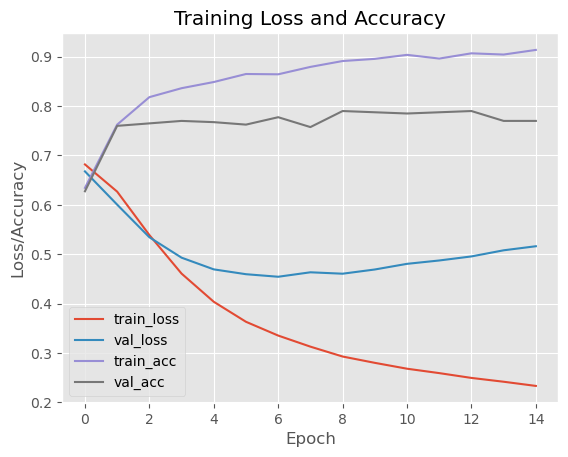

In [24]:
def plot_graphs(H, metric):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch" )
  plt.ylabel("Loss/Accuracy" )
  plt.legend()
  plt.show( )
plot_graphs(history,'accuracy')

step 7. prediction

In [25]:
def encode_sentence(input_text):
    encoded_text = tfidf_vectorizer.transform([input_text])
    encoded_text = encoded_text.toarray()
    return encoded_text


def prediction(encoded_text):
    predictions = model.predict(encoded_text)
    predicted_class = np.argmax(predictions)
    print("The predicted probability is:", predictions)
    print("The predicted class is:", predicted_class)


    if predicted_class == 0:
        print("The text is classified as: Negative")
    else:
        print("The text is classified as: Positive")

In [26]:
random_text = "This movie is shit"


to_pred = encode_sentence(random_text)
prediction(to_pred)

1/1 [==============================] - 0s 82ms/step
The predicted probability is: [[0.68325716 0.28905138]]
The predicted class is: 0
The text is classified as: Negative


Cosine similarity

In [27]:
def get_cosine_similarity(text1, text2):
    vectors = tfidf_vectorizer.fit_transform([text1, text2])
    similarity = cosine_similarity(vectors[0], vectors[1])
    return similarity[0][0]

text1 = 'this movie is bad'
text2 = 'words cannot describe how bad this movie is'

cosine = get_cosine_similarity(text1, text2)
print(cosine)

0.5797386715376657
